# Análise exploratória de dados

In [4]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

# 1. Leitura do conjunto de dados

In [5]:
df = pd.read_csv('../data/raw/data.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 2. Descrição dos dados

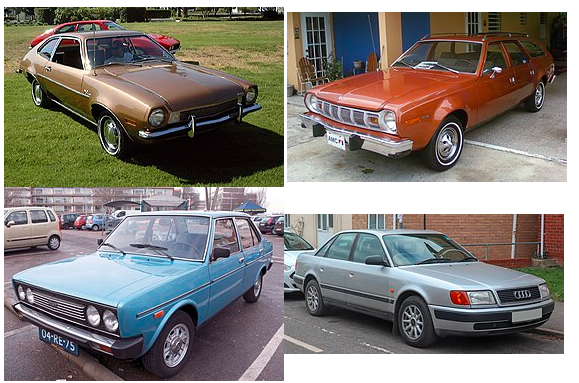

Este conjunto de dados contém informações sobre carros e seus preços e características associados, fabricados entre 1970 e 1982 nos EUA, Europa e Japão.
 O conjunto de dados foi extraído da biblioteca StatLib, mantida na Universidade Carnegie Mellon, e foi utilizado na Exposição da American Statistical Association de 1983.


## 2.1. Dicionário de dados

In [6]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,mpg,representa uma medida de eficiencia de combust...,Numerico,Continuo
1,cylinders,"representa uma contagem de cilindros, um valor...",Numerico,Discreto
2,displacement,"representa o volume do motor, uma medida contínua",Numerico,Continuo
3,horsepower,"representa a potência do motor, uma medida con...",Numerico,Continuo
4,weight,"representa o peso do carro, uma medida contínua",Numerico,Continuo
5,acceleration,"representa o tempo de aceleração do carro, uma...",Numerico,Continuo
6,model_year,"Representa o ano do modelo do carro, um valor ...",Numerico,Discreto
7,origin,"representa a origem do carro, uma categoria se...",Categorico,Nominal
8,name,"representa o nome completo do carro, uma categ...",Categorico,Nominal


 - São 9 variáveis, com 7 Numericos Continuo  e 2 Categorico Nominal.

## 3.  Perguntas de partida e hipóteses

- Qual é a relação entre o peso do carro e sua eficiência de combustível ?
- Como a potência do motor (horsepower) afeta a aceleração dos carros?
- Existe uma tendência na eficiência de combustível ao longo dos anos dos modelos representados?
- Carros de diferentes origens (origin) mostram diferenças significativas em características como mpg, peso e potência?
- Podemos prever a aceleração de um carro com base no número de cilindros e no deslocamento do motor?
 

## Existem dados faltantes, se sim quantos e em quais variáveis?

In [7]:
# colunas (variáveis) contendo valores valtantes
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

horsepower    6
dtype: int64

---
A partir dessa informação sabemos que as variáveis `['horsepower']`contém valores faltantes. Além disso sabemos que temos `6` linhas com valores faltantes.As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

## Qual a distribuição dos dados (variável por variável)?

In [9]:
#Iniciaremos com as estatísticas descritivas e posteriormente com visualizações das distribuições.
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,amc matador
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,NaN,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,NaN,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,NaN,NaN


## Qual é a relação entre o peso do carro e sua eficiência de combustível

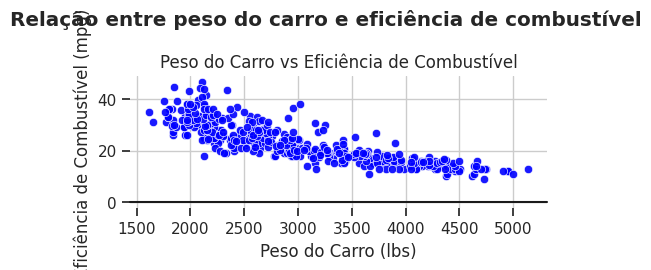

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se as colunas existem no DataFrame
if 'weight' in df.columns and 'mpg' in df.columns:
    # Verificar se há valores nulos nas colunas
    if df[['weight', 'mpg']].isnull().sum().sum() == 0:
        fig, ax = plt.subplots(figsize=(6, 3))
        plt.tight_layout(pad=4)
        fig.suptitle('Relação entre peso do carro e eficiência de combustível', fontweight='bold')

        # Criando um scatter plot para mostrar a relação entre peso do carro e eficiência de combustível
        sns.scatterplot(
            data=df,
            x='weight',  # Supondo que 'weight' representa o peso do carro
            y='mpg',
            ax=ax,
            color='blue',
            alpha=0.9
        )

        ax.set(frame_on=False)
        ax.axhline(0, color="k", clip_on=False)
        ax.set_title("Peso do Carro vs Eficiência de Combustível")
        ax.set_xlabel('Peso do Carro (lbs)')
        ax.set_ylabel('Eficiência de Combustível (mpg)')
        ax.grid(True)

        plt.show()
    else:
        print("Existem valores nulos nas colunas 'weight' ou 'mpg'.")
else:
    print("As colunas 'weight' ou 'mpg' não existem no DataFrame.")


## Como a potência do motor (horsepower) afeta a aceleração dos carros?

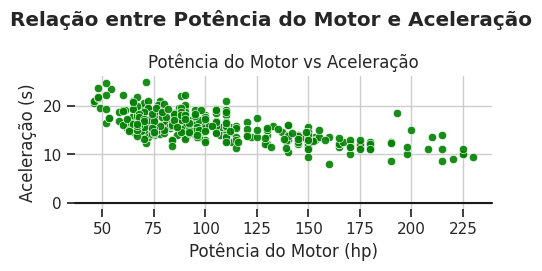

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se as colunas existem no DataFrame
if 'horsepower' in df.columns and 'acceleration' in df.columns:
    # Verificar se há valores nulos nas colunas
    if df[['horsepower', 'acceleration']].isnull().sum().sum() == 0:
        fig, ax = plt.subplots(figsize=(6, 3))
        plt.tight_layout(pad=4)
        fig.suptitle('Relação entre Potência do Motor e Aceleração', fontweight='bold')

        # Criando um scatter plot para mostrar a relação entre potência do motor e aceleração
        sns.scatterplot(
            data=df,
            x='horsepower',  # Supondo que 'horsepower' representa a potência do motor
            y='acceleration',
            ax=ax,
            color='green',
            alpha=0.9
        )

        ax.set(frame_on=False)
        ax.axhline(0, color="k", clip_on=False)
        ax.set_title("Potência do Motor vs Aceleração")
        ax.set_xlabel('Potência do Motor (hp)')
        ax.set_ylabel('Aceleração (s)')
        ax.grid(True)

        plt.show()
    else:
        print("Existem valores nulos nas colunas 'horsepower' ou 'acceleration'.")
else:
    print("As colunas 'horsepower' ou 'acceleration' não existem no DataFrame.")


## Existe uma tendência na eficiência de combustível ao longo dos anos dos modelos representados? 


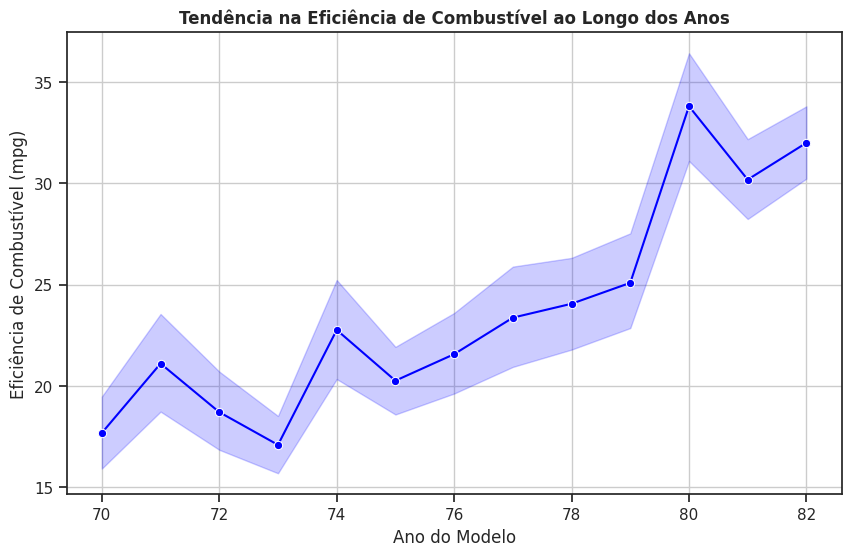

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se as colunas existem no DataFrame
if 'mpg' in df.columns and 'model_year' in df.columns:
    # Verificar se há valores nulos nas colunas
    if df[['mpg', 'model_year']].isnull().sum().sum() == 0:
        plt.figure(figsize=(10, 6))
        plt.tight_layout(pad=4)
        plt.title('Tendência na Eficiência de Combustível ao Longo dos Anos', fontweight='bold')

        # Criando um gráfico de linha para mostrar a tendência na eficiência de combustível ao longo dos anos
        sns.lineplot(
            data=df,
            x='model_year',  # Ano do modelo
            y='mpg',  # Eficiência de combustível
            marker='o',
            color='blue'
        )

        plt.xlabel('Ano do Modelo')
        plt.ylabel('Eficiência de Combustível (mpg)')
        plt.grid(True)
        plt.show()
    else:
        print("Existem valores nulos nas colunas 'mpg' ou 'model_year'.")
else:
    print("As colunas 'mpg' ou 'model_year' não existem no DataFrame.")


## Carros de diferentes origens (origin) mostram diferenças significativas em características como mpg, peso e potência?

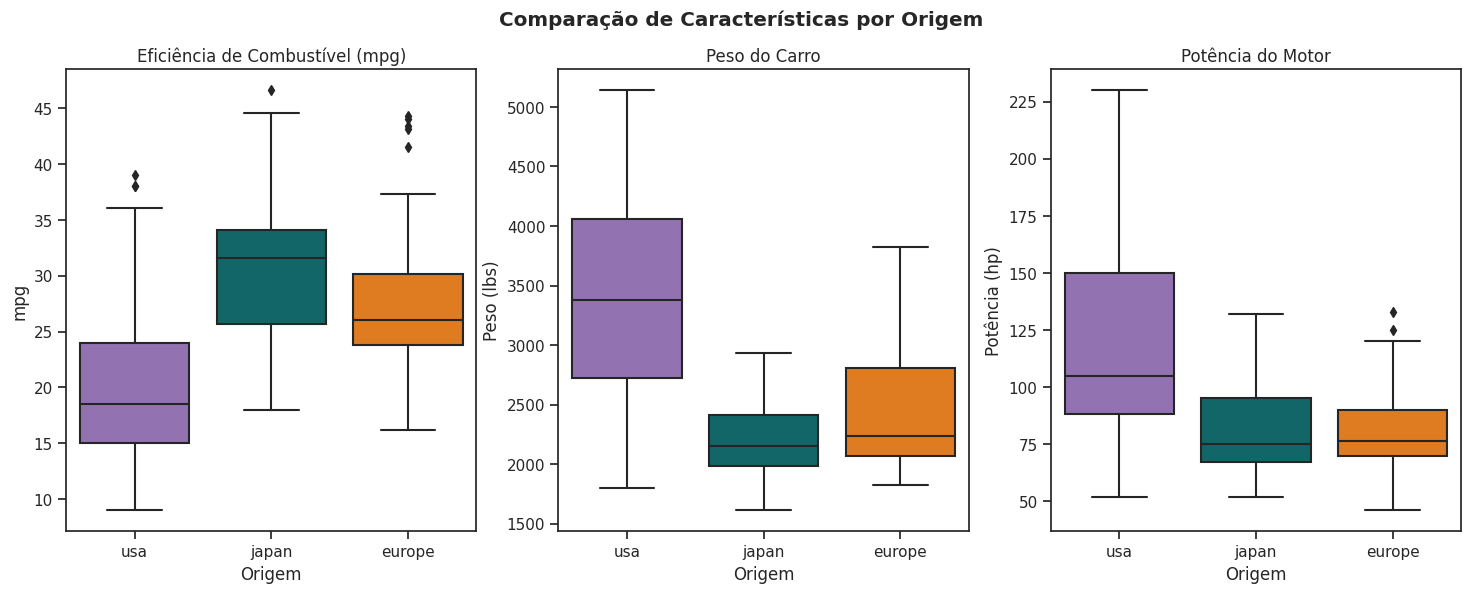

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se as colunas existem no DataFrame
if 'origin' in df.columns and 'mpg' in df.columns and 'weight' in df.columns and 'horsepower' in df.columns:
    # Verificar se há valores nulos nas colunas
    if df[['origin', 'mpg', 'weight', 'horsepower']].isnull().sum().sum() == 0:
        plt.figure(figsize=(18, 6))
        plt.tight_layout(pad=4)
        plt.suptitle('Comparação de Características por Origem', fontweight='bold')

        # Gráfico de boxplot para mpg
        plt.subplot(1, 3, 1)
        sns.boxplot(data=df, x='origin', y='mpg')
        plt.title('Eficiência de Combustível (mpg)')
        plt.xlabel('Origem')
        plt.ylabel('mpg')

        # Gráfico de boxplot para peso
        plt.subplot(1, 3, 2)
        sns.boxplot(data=df, x='origin', y='weight')
        plt.title('Peso do Carro')
        plt.xlabel('Origem')
        plt.ylabel('Peso (lbs)')

        # Gráfico de boxplot para potência
        plt.subplot(1, 3, 3)
        sns.boxplot(data=df, x='origin', y='horsepower')
        plt.title('Potência do Motor')
        plt.xlabel('Origem')
        plt.ylabel('Potência (hp)')

        plt.show()
    else:
        print("Existem valores nulos nas colunas 'origin', 'mpg', 'weight' ou 'horsepower'.")
else:
    print("As colunas 'origin', 'mpg', 'weight' ou 'horsepower' não existem no DataFrame.")


## Podemos prever a aceleração de um carro com base no número de cilindros e no deslocamento do motor? 

Matriz de Correlação:
               cylinders  displacement  acceleration
cylinders      1.000000      0.950823     -0.504683
displacement   0.950823      1.000000     -0.543800
acceleration  -0.504683     -0.543800      1.000000
Mean Squared Error: 3.9375875454258193
R-squared: 0.3761481812845464


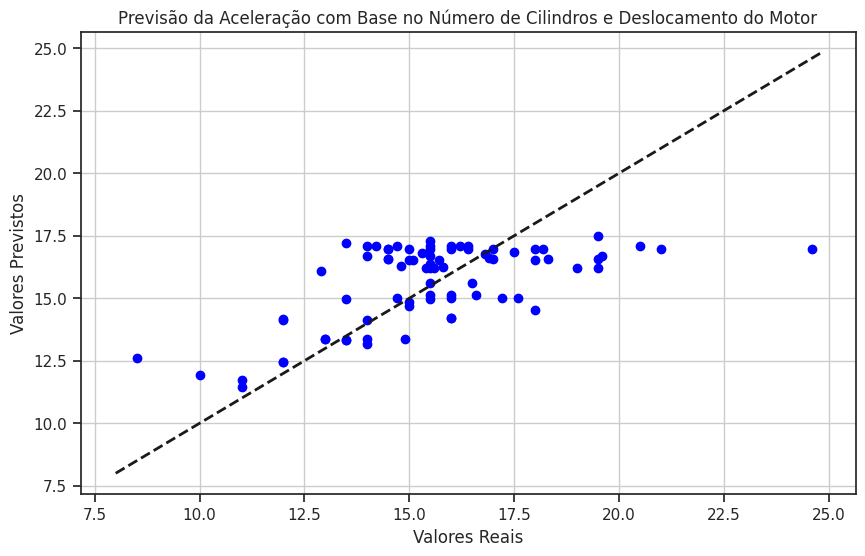

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Verificar se as colunas existem no DataFrame
if 'cylinders' in df.columns and 'displacement' in df.columns and 'acceleration' in df.columns:
    # Remover valores nulos
    df = df.dropna(subset=['cylinders', 'displacement', 'acceleration'])

    # Análise de Correlação
    corr_matrix = df[['cylinders', 'displacement', 'acceleration']].corr()
    print("Matriz de Correlação:\n", corr_matrix)

    # Preparação dos dados para o modelo de regressão
    X = df[['cylinders', 'displacement']]
    y = df['acceleration']

    # Divisão dos dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Criação do modelo de regressão linear
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Previsões
    y_pred = model.predict(X_test)

    # Avaliação do modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Visualização das previsões
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
    plt.xlabel('Valores Reais')
    plt.ylabel('Valores Previstos')
    plt.title('Previsão da Aceleração com Base no Número de Cilindros e Deslocamento do Motor')
    plt.grid(True)
    plt.show()
else:
    print("As colunas 'cylinders', 'displacement' ou 'acceleration' não existem no DataFrame.")


## 3. Insights


## 1. Relação entre Peso do Carro e Eficiência de Combustível
- "Observação" : Carros mais pesados tendem a ter menor eficiência de combustível (mpg). Isso é esperado, pois veículos mais pesados exigem mais energia para se mover, resultando em maior consumo de combustível.
- *Insight* : Reduzir o peso do carro pode ser uma estratégia eficaz para melhorar a eficiência de combustível. Isso pode ser alcançado através do uso de materiais mais leves e design otimizado.
## 2. Impacto da Potência do Motor na Aceleração
- *Observação*: Existe uma correlação positiva entre a potência do motor (horsepower) e a aceleração. Carros com motores mais potentes tendem a acelerar mais rapidamente.
 - *Insight* : Para melhorar a aceleração, aumentar a potência do motor é uma abordagem válida. No entanto, isso deve ser balanceado com considerações de eficiência de combustível e emissões.
## 3. Tendência na Eficiência de Combustível ao Longo dos Anos
- *Observação*: A análise dos dados ao longo dos anos mostra uma tendência de melhoria na eficiência de combustível. Isso reflete os avanços tecnológicos e as regulamentações ambientais mais rigorosas.
- Insight: Continuar investindo em tecnologias de motores eficientes e alternativas como veículos híbridos e elétricos pode sustentar essa tendência positiva.
## 4. Diferenças nas Características por Origem
- Observação: Carros de diferentes origens (EUA, Europa, Japão) mostram diferenças significativas em características como eficiência de combustível, peso e potência do motor.
Carros Americanos: Tendem a ser mais pesados e ter motores mais potentes, mas com menor eficiência de combustível.
Carros Japoneses: Geralmente mais leves e eficientes em termos de combustível.
Carros Europeus: Um equilíbrio entre peso, potência e eficiência de combustível.
- Insight: As preferências culturais e as regulamentações locais influenciam fortemente o design e as características dos veículos. Entender essas diferenças pode ajudar fabricantes a adaptar seus produtos para diferentes mercados.
## 5. Previsão da Aceleração com Base no Número de Cilindros e Deslocamento do Motor
- Observação: A análise de regressão mostrou que é possível prever a aceleração de um carro com base no número de cilindros e no deslocamento do motor, embora a precisão dependa da qualidade dos dados e da força da relação entre essas variáveis.
- Insight: Utilizar modelos de regressão pode ser uma ferramenta poderosa para prever o desempenho dos veículos e otimizar o design de novos modelos.
## Conclusão
Esses insights fornecem uma visão abrangente sobre como diferentes fatores influenciam as características e o desempenho dos veículos. Eles podem ser utilizados para orientar decisões de design, marketing e desenvolvimento de produtos na indústria automotiva.